In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [21]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
    

Found 20000 files belonging to 2 classes.
Found 4996 files belonging to 2 classes.


In [22]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 1581s 3s/step - loss: 1.3531 - accuracy: 0.5872 - val_loss: 0.6039 - val_accuracy: 0.6753
Epoch 2/10
625/625 [==============================] - 1571s 3s/step - loss: 0.5822 - accuracy: 0.7022 - val_loss: 0.5360 - val_accuracy: 0.7418
Epoch 3/10
625/625 [==============================] - 1575s 3s/step - loss: 0.5190 - accuracy: 0.7545 - val_loss: 0.6363 - val_accuracy: 0.6415
Epoch 4/10
625/625 [==============================] - 1559s 2s/step - loss: 0.4574 - accuracy: 0.7870 - val_loss: 0.4322 - val_accuracy: 0.8060
Epoch 5/10
625/625 [==============================] - 1596s 3s/step - loss: 0.3843 - accuracy: 0.8280 - val_loss: 0.5243 - val_accuracy: 0.7830
Epoch 6/10
625/625 [==============================] - 1552s 2s/step - loss: 0.3306 - accuracy: 0.8524 - val_loss: 0.4774 - val_accuracy: 0.7712
Epoch 7/10
625/625 [==============================] - 1610s 3s/step - loss: 0.2697 - accuracy: 0.8830 - val_loss: 0.5105 - val_accuracy:

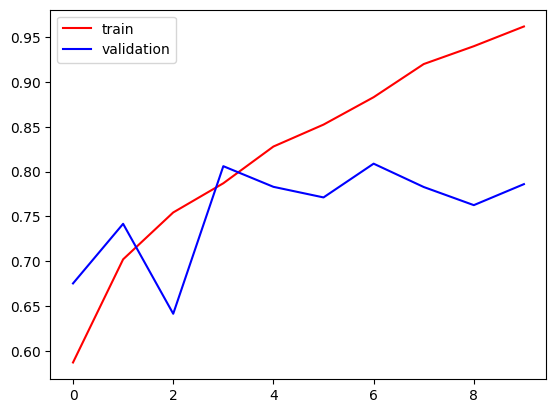

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

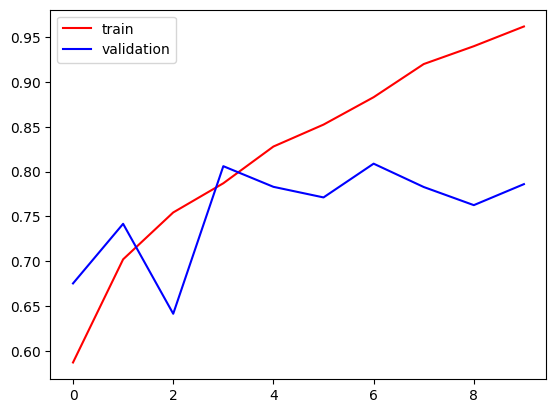

In [28]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

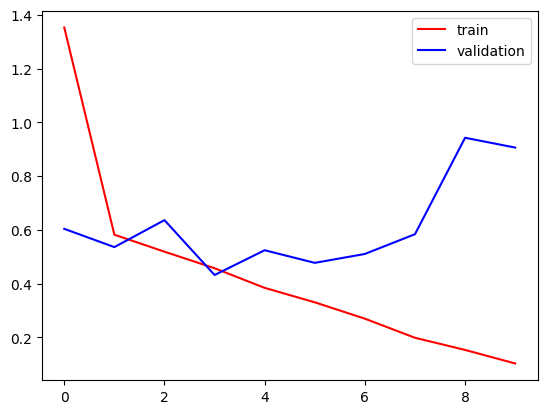

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

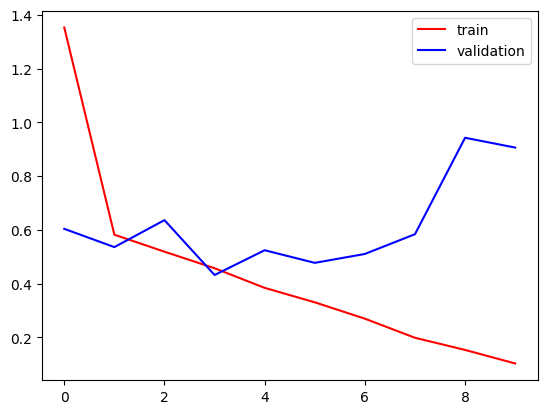

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
import cv2

In [32]:
test_img = cv2.imread('dog.jpg')

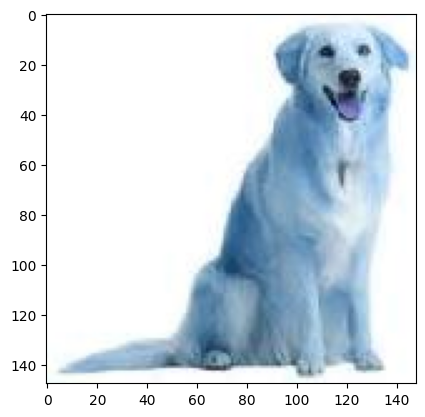

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(148, 148, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
output = model.predict(test_input)

if output == 1.0:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 58ms/step
It's a dog!


In [39]:
test_img = cv2.imread('cat.jpg')

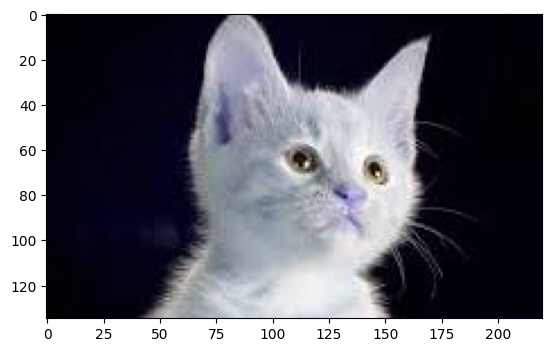

In [40]:
plt.imshow(test_img)

In [41]:
test_img.shape

(135, 220, 3)

In [42]:
test_img = cv2.resize(test_img,(256,256))

In [43]:
test_input = test_img.reshape((1,256,256,3))

In [44]:
output = model.predict(test_input)

if output == 1.0:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 69ms/step
It's a cat!


In [45]:
test_img = cv2.imread('dog1.jpg')

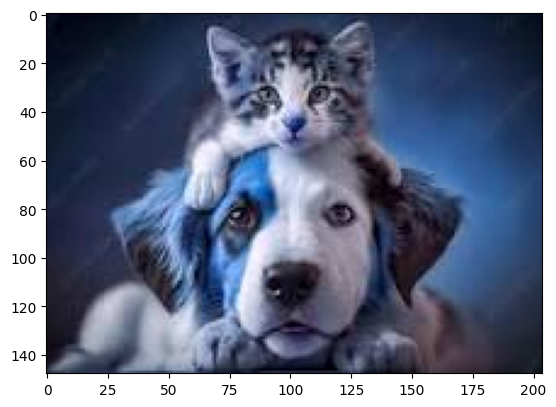

In [46]:
plt.imshow(test_img)

In [47]:
test_img.shape

(148, 204, 3)

In [48]:
test_img = cv2.resize(test_img,(256,256))

In [49]:
test_input = test_img.reshape((1,256,256,3))

In [50]:
output = model.predict(test_input)

if output == 1.0:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 60ms/step
It's a dog!
